# Data Process Pipeline

## Library Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("All imports successful")
pd.set_option('display.max_columns', None)


All imports successful


## Data Frame Load

In [2]:
df = pd.read_excel("Dataset.xlsx")

## Data Inspection

In [3]:
print(df.shape)

(237630, 35)


In [4]:
print(df.head())


   PatientID    State     Sex GeneralHealth   AgeCategory  HeightInMeters  \
0          1  Alabama  Female          Fair  Age 75 to 79            1.63   
1          2  Alabama  Female     Very good  Age 65 to 69            1.60   
2          3  Alabama    Male     Excellent  Age 60 to 64            1.78   
3          4  Alabama    Male     Very good  Age 70 to 74            1.78   
4          5  Alabama  Female          Good  Age 50 to 54            1.68   

   WeightInKilograms        BMI  HadHeartAttack  HadAngina  HadStroke  \
0          84.820000  32.099998               0          1          0   
1          71.669998  27.990000               0          0          0   
2          71.209999  22.530001               0          0          0   
3          95.250000  30.129999               0          0          0   
4          78.019997  27.760000               0          0          0   

   HadAsthma  HadSkinCancer  HadCOPD  HadDepressiveDisorder  HadKidneyDisease  \
0          1     

In [5]:
df.tail()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
237625,237626,Puerto Rico,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,0,0,0,0,0,0,0,1,0,Yes,0,1,0,0,0,0,Never smoked,Not at all (right now),0,Hispanic,0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
237626,237627,Puerto Rico,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,0,1,0,0,0,0,1,0,1,No,0,0,0,0,0,0,Former smoker,Not at all (right now),0,Hispanic,0,1,0,0,"Yes, received Tdap",0,0
237627,237628,Puerto Rico,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,1,1,0,0,0,0,0,0,1,No,0,0,1,1,1,0,Current smoker - now smokes every day,Not at all (right now),1,Hispanic,0,1,1,1,"Yes, received Tdap",1,0
237628,237629,Puerto Rico,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,Hispanic,0,1,0,0,"No, did not receive any tetanus shot in the pa...",0,1
237629,237630,Puerto Rico,Female,Good,Age 30 to 34,1.60,83.010002,32.419998,0,0,0,0,0,0,0,0,0,"No, pre-diabetes or borderline diabetes",0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,1,Hispanic,0,1,0,0,"No, did not receive any tetanus shot in the pa...",0,0


## Data types

In [6]:
df.dtypes

PatientID                      int64
State                            str
Sex                              str
GeneralHealth                    str
AgeCategory                      str
HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                      str
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                     str
ECigaretteUsage                  str
ChestScan                      int64
R

## Balance Analysis for Category Columns

In [7]:
# Updated to handle the new Pandas string behavior
for col in df.select_dtypes(include=['object', 'category', 'string']).columns:
    print(f"--- Column: {col} ---")
    print(df[col].value_counts(normalize=True) * 100)
    print("-" * 20)

--- Column: State ---
State
Washington              5.992930
Maryland                3.710390
Minnesota               3.666204
Ohio                    3.661154
New York                3.629592
Texas                   3.058116
Florida                 2.997938
Kansas                  2.524934
Wisconsin               2.478643
Maine                   2.402474
Iowa                    2.311156
Indiana                 2.269495
South Carolina          2.255607
Virginia                2.254766
Arizona                 2.231200
Hawaii                  2.214367
Utah                    2.193326
Michigan                2.190801
Massachusetts           2.173126
Nebraska                2.107478
Colorado                2.092749
Georgia                 2.045196
California              2.020368
Connecticut             2.005218
Vermont                 1.922737
South Dakota            1.801119
Montana                 1.748517
Missouri                1.700964
New Jersey              1.613012
New Hampshire  

## Balance Analysis for Numeric Columns

In [8]:
# Check for Skewness (0 is perfectly balanced/symmetric)
print(df.select_dtypes(include=['number']).skew())

PatientID                   -1.067971e-16
HeightInMeters               3.126332e-02
WeightInKilograms            1.024894e+00
BMI                          1.325844e+00
HadHeartAttack               3.880711e+00
HadAngina                    3.650042e+00
HadStroke                    4.580306e+00
HadAsthma                    1.976796e+00
HadSkinCancer                2.971015e+00
HadCOPD                      3.139982e+00
HadDepressiveDisorder        1.455681e+00
HadKidneyDisease             4.312172e+00
HadArthritis                 6.449596e-01
DeafOrHardOfHearing          2.943443e+00
BlindOrVisionDifficulty      4.108201e+00
DifficultyConcentrating      2.537470e+00
DifficultyWalking            1.972172e+00
DifficultyDressingBathing    5.099140e+00
DifficultyErrands            3.445677e+00
ChestScan                    2.954082e-01
AlcoholDrinkers             -1.818874e-01
HIVTesting                   6.628770e-01
FluVaxLast12                -1.278884e-01
PneumoVaxEver                3.780

# Data Cleaning 

## Missing value checking

In [9]:
print(df.isnull().sum())

PatientID                    0
State                        0
Sex                          0
GeneralHealth                0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

## Duplicate Value Check

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 35)


## Dropping Unncessory Columns

In [11]:
df = df.drop(["PatientID" ], axis= 1)
#Droping unnecessary columns

# Feature Engineering

## Mapping Age Column

In [12]:
age_group_map = {
    "Age 18 to 24": "Young",
    "Age 25 to 29": "Young",
    "Age 30 to 34": "Young",
    "Age 35 to 39": "Young",
    "Age 40 to 44": "Middle-aged",
    "Age 45 to 49": "Middle-aged",
    "Age 50 to 54": "Middle-aged",
    "Age 55 to 59": "Middle-aged",
    "Age 60 to 64": "Senior",
    "Age 65 to 69": "Senior",
    "Age 70 to 74": "Senior",
    "Age 75 to 79": "Senior",
    "Age 80 or older": "Senior"
}
df["AgeGroup"] = df["AgeCategory"].map(age_group_map)

## Mapping Region

In [13]:
region_map = {
    # Northeast
    "New York": "Northeast", "New Jersey": "Northeast", "Pennsylvania": "Northeast",
    "Massachusetts": "Northeast", "Connecticut": "Northeast", "Rhode Island": "Northeast",
    "New Hampshire": "Northeast", "Vermont": "Northeast", "Maine": "Northeast",

    # Midwest
    "Ohio": "Midwest", "Indiana": "Midwest", "Illinois": "Midwest", "Michigan": "Midwest",
    "Wisconsin": "Midwest", "Minnesota": "Midwest", "Iowa": "Midwest", "Missouri": "Midwest",
    "North Dakota": "Midwest", "South Dakota": "Midwest", "Nebraska": "Midwest", "Kansas": "Midwest",

    # South
    "Delaware": "South", "Maryland": "South", "District of Columbia": "South", "Virginia": "South",
    "West Virginia": "South", "North Carolina": "South", "South Carolina": "South", "Georgia": "South",
    "Florida": "South", "Kentucky": "South", "Tennessee": "South", "Alabama": "South", "Mississippi": "South",
    "Arkansas": "South", "Louisiana": "South", "Texas": "South", "Oklahoma": "South",

    # West
    "Montana": "West", "Wyoming": "West", "Colorado": "West", "New Mexico": "West",
    "Arizona": "West", "Utah": "West", "Nevada": "West", "Idaho": "West",
    "Washington": "West", "Oregon": "West", "California": "West",
    "Alaska": "West", "Hawaii": "West",

    # Territories
    "Puerto Rico": "Territory", "Guam": "Territory", "Virgin Islands": "Territory"
}

df["Region"] = df["State"].map(region_map)

## Mapping BMI

In [14]:
#BMI Risk
df["BMI_Check"] = (df["BMI"] > 30).astype(int)
#if BMI check = 1, then BMI is Obese


# Encoding Categorical Variables

## Checking Encoding Needed columns

In [15]:
df["GeneralHealth"].value_counts()
#Checking count for column

GeneralHealth
Very good    83520
Good         74950
Excellent    39911
Fair         29965
Poor          9284
Name: count, dtype: int64

In [16]:
df["AgeCategory"].value_counts()
#Checking count for column

AgeCategory
Age 65 to 69       27547
Age 60 to 64       25685
Age 70 to 74       24946
Age 55 to 59       21422
Age 50 to 54       19154
Age 75 to 79       17679
Age 80 or older    17544
Age 40 to 44       16228
Age 45 to 49       16095
Age 35 to 39       14982
Age 30 to 34       12825
Age 18 to 24       12777
Age 25 to 29       10746
Name: count, dtype: int64

In [17]:
df["HadDiabetes"].value_counts()
#Checking count for column

HadDiabetes
No                                         197463
Yes                                         33055
No, pre-diabetes or borderline diabetes      5211
Yes, but only during pregnancy (female)      1901
Name: count, dtype: int64

In [18]:
df["SmokerStatus"].value_counts()
#Checking count for column

SmokerStatus
Never smoked                             142390
Former smoker                             66193
Current smoker - now smokes every day     21148
Current smoker - now smokes some days      7899
Name: count, dtype: int64

In [19]:
df["ECigaretteUsage"].value_counts()
#Checking count for column

ECigaretteUsage
Never used e-cigarettes in my entire life    183446
Not at all (right now)                        41963
Use them some days                             6468
Use them every day                             5753
Name: count, dtype: int64

In [20]:
df["State"].value_counts()
#Checking count for column

State
Washington              14241
Maryland                 8817
Minnesota                8712
Ohio                     8700
New York                 8625
Texas                    7267
Florida                  7124
Kansas                   6000
Wisconsin                5890
Maine                    5709
Iowa                     5492
Indiana                  5393
South Carolina           5360
Virginia                 5358
Arizona                  5302
Hawaii                   5262
Utah                     5212
Michigan                 5206
Massachusetts            5164
Nebraska                 5008
Colorado                 4973
Georgia                  4860
California               4801
Connecticut              4765
Vermont                  4569
South Dakota             4280
Montana                  4155
Missouri                 4042
New Jersey               3833
New Hampshire            3564
Puerto Rico              3550
Idaho                    3394
Alaska                   3100
Rhod

## Encoding 

In [21]:
df["Sex"] = df["Sex"].map({"Male":1, "Female":0})
#Encoding Gender

In [22]:
df["GeneralHealth"] = df["GeneralHealth"].map({"Poor":0, "Fair":1, "Good":2, "Very good":3, "Excellent":4})

In [23]:
df["HadDiabetes"] = df["HadDiabetes"].map({"No, pre-diabetes or borderline diabetes":0, "No":0, "Yes":1, "Yes, but only during pregnancy (female)":1})

In [24]:
df["SmokerStatus"] = df["SmokerStatus"].map({
    "Never smoked": 0,
    "Former smoker": 1,
    "Current smoker - now smokes some days": 2,
    "Current smoker - now smokes every day": 3
})

In [25]:
df["ECigaretteUsage"] = df["ECigaretteUsage"].map({
    "Never used e-cigarettes in my entire life": 0,
    "Not at all (right now)": 1,
    "Use them some days": 2,
    "Use them every day": 3
})

## Handling Unnecessory original columns

In [26]:
# Drop the original high-detail columns
df = df.drop(['State', 'AgeCategory'], axis=1)

In [27]:
df["AgeGroup"].value_counts()
#Checking count for column

AgeGroup
Senior         113401
Middle-aged     72899
Young           51330
Name: count, dtype: int64

In [28]:
# Map the text to ordered numbers (adjust the text keys to match your exact data)
age_map = {
    'Young': 0, 
    'Middle-aged': 1, 
    'Senior': 2
}

# Apply the map and drop the old text column
df['AgeGroup_Encoded'] = df['AgeGroup'].map(age_map)
df = df.drop('AgeGroup', axis=1)

In [29]:
# List the columns that have no natural order
columns_to_dummy = ['RaceEthnicityCategory', 'TetanusLast10Tdap', 'Region']

# Create the dummy columns
# drop_first=True prevents a statistical issue called multicollinearity
df = pd.get_dummies(df, columns=columns_to_dummy, drop_first=True)

In [30]:
print(df.isnull().sum())


Sex                                                                    0
GeneralHealth                                                          0
HeightInMeters                                                         0
WeightInKilograms                                                      0
BMI                                                                    0
HadHeartAttack                                                         0
HadAngina                                                              0
HadStroke                                                              0
HadAsthma                                                              0
HadSkinCancer                                                          0
HadCOPD                                                                0
HadDepressiveDisorder                                                  0
HadKidneyDisease                                                       0
HadArthritis                                       

In [31]:
# Show only the columns that actually have missing values
missing_counts = df.isna().sum()
print(missing_counts[missing_counts > 0])

Series([], dtype: int64)


In [32]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (772, 43)


# Train test split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Drop the target column to get your features
X = df.drop('HadHeartAttack', axis=1) 

# Select only the target column
y = df['HadHeartAttack']

# Train test split, capping and normalization

In [35]:
# --- REPLACEMENT CODE FOR CELLS 86, 87, & 88 ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1. SPLIT (Do this exactly once)
X = df.drop('HadHeartAttack', axis=1) 
y = df['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. CAPPING (Apply to the split data)
def apply_capping(df, col, lower, upper):
    return df[col].clip(lower=lower, upper=upper)

outlier_cols = ['HeightInMeters', 'WeightInKilograms', 'BMI']
capping_limits = {}

for col in outlier_cols:
    # Calculate limits from Train set only
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Save limits
    capping_limits[col] = (lower, upper)
    
    # Apply to Train
    X_train[col] = apply_capping(X_train, col, lower, upper)

# Apply saved limits to Test
for col in outlier_cols:
    lower, upper = capping_limits[col]
    X_test[col] = apply_capping(X_test, col, lower, upper)

print("Outliers capped. X_train has been modified.")

# 3. SCALING (Apply to the capped data)
# Note: We scale AFTER capping because MinMaxScaler is sensitive to outliers.
scaler = MinMaxScaler()

# Fit on Train, Transform Train & Test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability (and for Feature Selection later)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Data Scaled successfully.")

Outliers capped. X_train has been modified.
Data Scaled successfully.


# SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Initialize SMOTE
sm = SMOTE(random_state=42)

# 2. Apply SMOTE to the SCALED training data
# This ensures synthetic points are created based on normalized distances
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# 3. Check the new balance
print(f"Original training shape: {Counter(y_train)}")
print(f"Resampled training shape: {Counter(y_train_res)}")

Original training shape: Counter({0: 179555, 1: 10549})
Resampled training shape: Counter({0: 179555, 1: 179555})


# Feature Selection

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# 1. Initialize the selector to keep the top 15 features
selector = SelectKBest(score_func=f_classif, k=20)

# 2. Fit to the BALANCED training data (X_train_res) 
# and transform both train and test sets
X_train_final = selector.fit_transform(X_train_res, y_train_res)
X_test_final = selector.transform(X_test_scaled)

# 3. Identify which columns were kept
kept_columns = X_train_scaled.columns[selector.get_support()]

# 4. Convert back to DataFrames for better readability
X_train_final = pd.DataFrame(X_train_final, columns=kept_columns)
X_test_final = pd.DataFrame(X_test_final, columns=kept_columns)

print("The algorithm chose to keep these features:\n", kept_columns.tolist())

The algorithm chose to keep these features:
 ['Sex', 'GeneralHealth', 'HadAngina', 'HadStroke', 'HadCOPD', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ChestScan', 'AlcoholDrinkers', 'FluVaxLast12', 'PneumoVaxEver', 'AgeGroup_Encoded', 'TetanusLast10Tdap_Yes, received Tdap']


# Model Selection

In [38]:
# --- REPLACEMENT FOR CELL 39 ---
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 1. Define the Splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Define the Models
# Note: We reduce XGBoost complexity to prevent overfitting
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

print(f"{'Model':<20} | {'Recall (Honest)':<20} | {'Accuracy (Honest)':<20}")
print("-" * 65)

for name, model in models.items():
    # 3. Create a Pipeline for EACH fold
    # This ensures SMOTE happens INSIDE the loop, preventing leakage.
    # Flow: Raw Data -> SMOTE -> Select Features -> Train Model
    pipeline = ImbPipeline(steps=[
        ('smote', SMOTE(random_state=42)),
        ('selector', SelectKBest(score_func=f_classif, k=20)),
        ('model', model)
    ])
    
    # 4. Run CV on the SCALED data (Before global SMOTE)
    # Use X_train_scaled and y_train (NOT y_train_res)
    recall_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=skf, scoring='recall')
    acc_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=skf, scoring='accuracy')
    
    print(f"{name:<20} | {recall_scores.mean():.4f} (+/- {recall_scores.std():.3f}) | {acc_scores.mean():.4f}")

Model                | Recall (Honest)      | Accuracy (Honest)   
-----------------------------------------------------------------
Logistic Regression  | 0.7590 (+/- 0.008) | 0.8286
Random Forest        | 0.5928 (+/- 0.012) | 0.9121
XGBoost              | 0.3379 (+/- 0.009) | 0.9452


In [39]:
# --- DEFINE MODELS FOR FINAL TESTING ---

# 1. Re-initialize the models you want to test finally
# (We use the same settings as in your Cross-Validation)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 2. Define which one is your "Final Champion" for the feature importance plot
# (Change this to rf_model if Random Forest performed better in the CV step)
final_model = log_reg 

print("Models initialized and ready for final testing.")

Models initialized and ready for final testing.


In [40]:
# --- UPDATE FOR CELL 40 ---
from sklearn.metrics import classification_report

# List candidates
candidates = [log_reg, rf_model]

for model in candidates:
    model_name = type(model).__name__
    print(f"--- FINAL TEST RESULTS: {model_name} ---")
    
    # Fit on the full processed training set
    model.fit(X_train_final, y_train_res)
    
    # Predict on the real, untouched test set
    y_pred = model.predict(X_test_final)
    
    # Report
    print(classification_report(y_test, y_pred))
    print("\n")

--- FINAL TEST RESULTS: LogisticRegression ---
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     44874
           1       0.21      0.74      0.32      2652

    accuracy                           0.83     47526
   macro avg       0.59      0.79      0.61     47526
weighted avg       0.94      0.83      0.87     47526



--- FINAL TEST RESULTS: RandomForestClassifier ---
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     44874
           1       0.31      0.58      0.41      2652

    accuracy                           0.91     47526
   macro avg       0.64      0.75      0.68     47526
weighted avg       0.94      0.91      0.92     47526





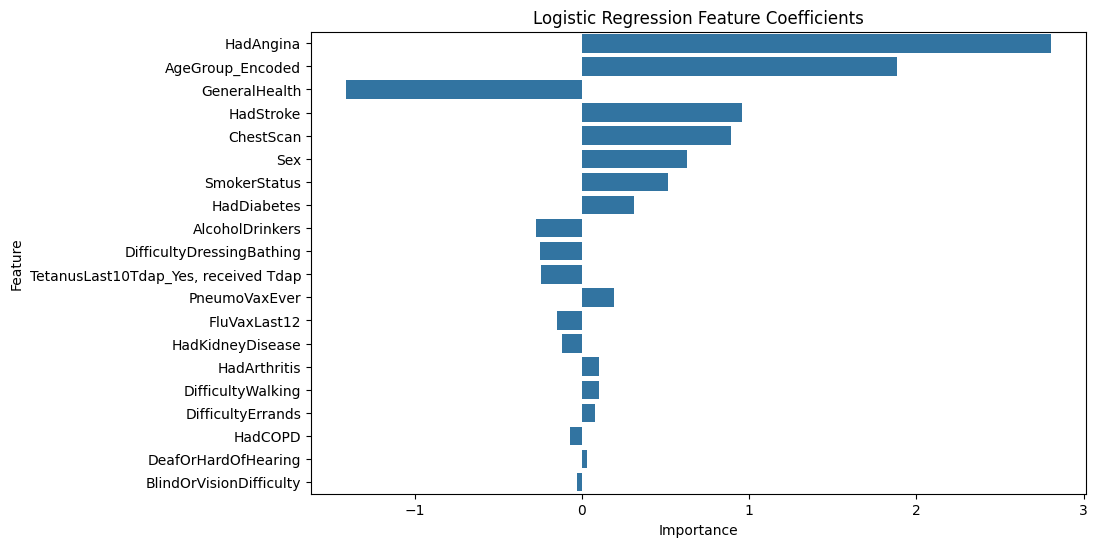

In [41]:
import pandas as pd
import seaborn as sns

# A. For Logistic Regression (use Coefficients)
if hasattr(final_model, 'coef_'):
    importance = final_model.coef_[0]
    feat_names = X_train_final.columns
    df_imp = pd.DataFrame({'Feature': feat_names, 'Importance': importance})
    
    # Sort by absolute value (magnitude of impact)
    df_imp['Abs_Importance'] = df_imp['Importance'].abs()
    df_imp = df_imp.sort_values(by='Abs_Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=df_imp)
    plt.title("Logistic Regression Feature Coefficients")
    plt.show()

# B. For Random Forest / XGBoost (use Feature Importances)
elif hasattr(final_model, 'feature_importances_'):
    importance = final_model.feature_importances_
    feat_names = X_train_final.columns
    df_imp = pd.DataFrame({'Feature': feat_names, 'Importance': importance})
    df_imp = df_imp.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=df_imp)
    plt.title("Tree Model Feature Importance")
    plt.show()

In [42]:
import joblib
from sklearn.preprocessing import MinMaxScaler

# 1. Create a NEW scaler specifically for the final features
# X_train_final is the dataframe that has ONLY the 20 selected columns
final_scaler = MinMaxScaler()
final_scaler.fit(X_train_final) 

# 2. Package this NEW scaler with your model
model_package = {
    'model': log_reg,       # Your trained Logistic Regression model
    'scaler': final_scaler, # <--- The NEW scaler (fitted on 20 cols)
    'selector': selector,   # The feature selector
    'features': X_train_final.columns.tolist() # The list of 20 column names
}

# 3. Overwrite the old pickle file
joblib.dump(model_package, 'heart_attack_model.pkl')

print("SUCCESS: Model saved with the CORRECT scaler.")

SUCCESS: Model saved with the CORRECT scaler.


In [43]:
# After you have X_train_final (the 20 selected features)
final_scaler = MinMaxScaler()
X_train_final_scaled = final_scaler.fit_transform(X_train_final)

# Save THIS scaler instead of the original big one
model_package = {
    'model': log_reg,
    'scaler': final_scaler, 
    'features': X_train_final.columns.tolist()
}
joblib.dump(model_package, 'heart_attack_model.pkl')

['heart_attack_model.pkl']